<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# Заменим пустые строки на NaN (столбец 'TotalSpent' содержит строки, а не числа с плавающей точкой)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
print(data.shape)
# Удалим все объекты с NaN в 'TotalSpent'
data = data.dropna()
print(data.shape)

(5282, 20)
(5273, 20)


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>]], dtype=object)

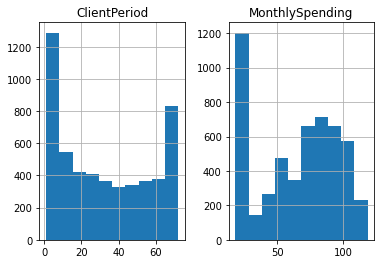

In [7]:
data[num_cols].hist()

In [8]:
for i in cat_cols:
    print(data[i].value_counts())
    print()

Male      2651
Female    2622
Name: Sex, dtype: int64

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

No     2704
Yes    2569
Name: HasPartner, dtype: int64

No     3676
Yes    1597
Name: HasChild, dtype: int64

Yes    4754
No      519
Name: HasPhoneService, dtype: int64

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: in

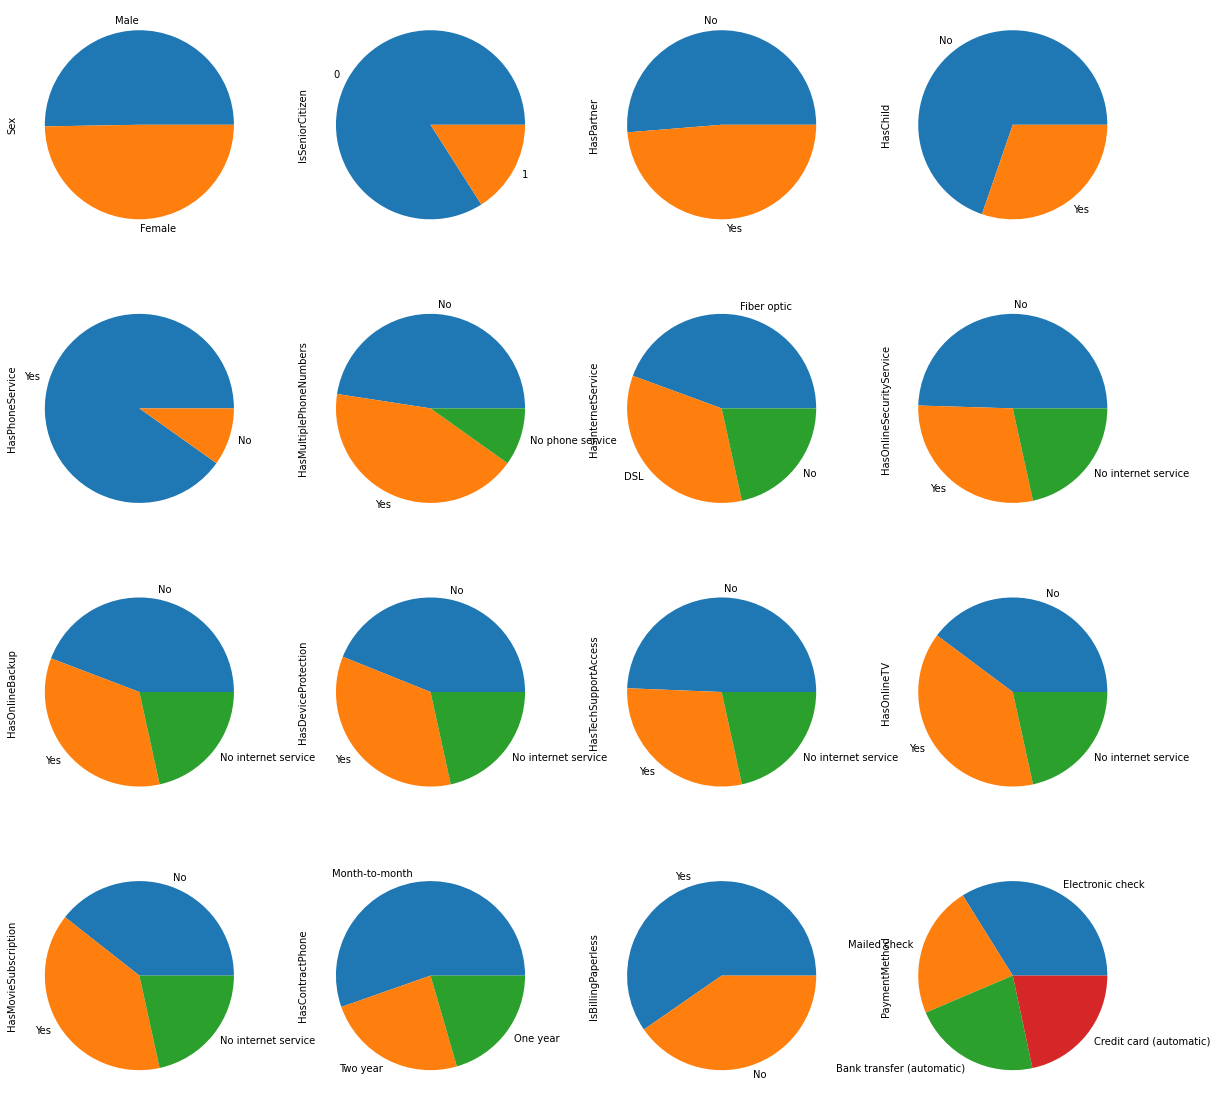

In [9]:
fig = plt.figure(figsize=(20,20))
j = 1
for i in cat_cols:
    fig.add_subplot(4,4,j)
    data[i].value_counts().plot.pie()
    j += 1
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

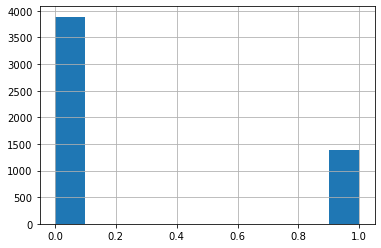

In [104]:
# Видно, что классы несбалансированы
# Но сильной несбалансированности тут нет
data['Churn'].hist()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [11]:
numeric_data = data[num_cols]
categorial_data = data[cat_cols]

In [12]:
dummy_features = pd.get_dummies(categorial_data)

In [13]:
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data.iloc[:, -1:]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, train_size=0.8, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = np.hstack((scaler.fit_transform(X_train.values[:, :3]), X_train.values[:, 3:]))
X_test_scaled = np.hstack((scaler.transform(X_test.values[:, :3]), X_test.values[:, 3:]))

In [16]:
print(X_train_scaled.shape)
print(X_train.shape)

(4218, 45)
(4218, 45)


In [17]:
print(X_test_scaled.shape)
print(X_test.shape)

(1055, 45)
(1055, 45)


In [18]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv = 5, Cs = [100, 10, 1, 0.1, 0.01, 0.001], scoring = 'roc_auc', refit = True)
model = model.fit(X_train_scaled, y_train)

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [231]:
model.get_params()

{'Cs': [100, 10, 1, 0.1, 0.01, 0.001],
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [233]:
# Лучшее значение коэффициента C
print(model.C_)

[10.]


In [19]:
# Посмотрим качество на тестовой выборке
roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

0.8439631988676575

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [23]:
import catboost

In [24]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model = boosting_model.fit(X_train, y_train)

Learning rate set to 0.019048
0:	learn: 0.6798491	total: 278ms	remaining: 4m 37s
1:	learn: 0.6677955	total: 353ms	remaining: 2m 56s
2:	learn: 0.6571836	total: 421ms	remaining: 2m 19s
3:	learn: 0.6468613	total: 485ms	remaining: 2m
4:	learn: 0.6376136	total: 521ms	remaining: 1m 43s
5:	learn: 0.6271037	total: 602ms	remaining: 1m 39s
6:	learn: 0.6183917	total: 680ms	remaining: 1m 36s
7:	learn: 0.6099743	total: 718ms	remaining: 1m 28s
8:	learn: 0.6016557	total: 781ms	remaining: 1m 25s
9:	learn: 0.5949784	total: 845ms	remaining: 1m 23s
10:	learn: 0.5877047	total: 904ms	remaining: 1m 21s
11:	learn: 0.5816288	total: 955ms	remaining: 1m 18s
12:	learn: 0.5746787	total: 1.03s	remaining: 1m 18s
13:	learn: 0.5670614	total: 1.1s	remaining: 1m 17s
14:	learn: 0.5607041	total: 1.16s	remaining: 1m 16s
15:	learn: 0.5542519	total: 1.23s	remaining: 1m 15s
16:	learn: 0.5487942	total: 1.31s	remaining: 1m 15s
17:	learn: 0.5438087	total: 1.37s	remaining: 1m 14s
18:	learn: 0.5381002	total: 1.43s	remaining: 1m 1

In [255]:
boosting_model.tree_count_

1000

In [256]:
boosting_model.learning_rate_

0.019047999754548073

In [257]:
boosting_model.best_score_

{'learn': {'Logloss': 0.3209392261018716}}

In [25]:
roc_auc_score(y_test, boosting_model.predict_proba(X_test)[:, 1])

0.8497392233253739

In [260]:
#################

In [268]:
_boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
_boosting_model.grid_search({'learning_rate': np.linspace(0, 1, 10), 'num_trees': [50, 200, 500, 750]}, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.856183809
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8561838	best: 0.8561838 (0)	total: 319ms	remaining: 12.5s

bestTest = 0.8597738288
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8597738	best: 0.8597738 (1)	total: 500ms	remaining: 9.51s

bestTest = 0.8586896428
bestIteration = 24

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8586896	best: 0.8597738 (1)	total: 696ms	remaining: 8.58s

bestTest = 0.8541518578
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8541519	best: 0.8597738 (1)	total: 887ms	remaining: 7.98s

bestTest


bestTest = 0.8506336385
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8506336	best: 0.8613283 (10)	total: 1m 39s	remaining: 14.2s

bestTest = 0.8433243583
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8433244	best: 0.8613283 (10)	total: 1m 45s	remaining: 11.7s
Estimating final quality...


{'params': {'iterations': 200, 'learning_rate': 0.2222222222222222},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
 

In [269]:
# Наилучшие результаты получаются при
# learning_rate = 0.2222222 ...
# и
# num_trees от 200 (минимум)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [26]:
best_model = boosting_model

In [30]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

In [274]:
# Аккаунт на kaggle -
# Денис_Докиенко
#
# username -
# denisdokienko
#
# результат -
# 0.85026
#
# номер посылки -
# 1

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.